# LOADING THE DATA AND IMPORTIG THE NECESSARY LIBRARIES


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import os



In [ ]:

np.expand_dims??

In [ ]:
os.path.join(r'C:\Users\BHARGAVI\OneDrive\Desktop\DEEP LEARNING\toxicdata','train.csv','train.csv')


'C:\\Users\\BHARGAVI\\OneDrive\\Desktop\\DEEP LEARNING\\toxicdata/train.csv/train.csv'

In [ ]:
# folder_path = r'C:\Users\BHARGAVI\OneDrive\Desktop\deep learning\toxicdata\train.csv'
# file_name = 'train.csv'
# file_path = os.path.join(folder_path, file_name)



In [ ]:

# Threat messages to add
threat_messages = [
    "If you don't give me the money, you'll regret it.",
    "I'm going to find you and make you pay.",
    "Watch your back, something bad is going to happen to you.",
    "You better not show up tomorrow, or else.",
    "This is your final warning, do what I say or face the consequences.",
    "If you tell anyone, you'll be sorry.",
    "I'm coming for you, and you won't like what happens next.",
    "You have until midnight to comply, or else.",
    "I will destroy everything you love if you don't cooperate.",
    "You think you're safe, but you're not. I'm going to hurt you.",
    "Keep ignoring me and see what happens.",
    "Don't underestimate me, I can ruin your life.",
    "You will pay for what you did, mark my words.",
    "I'm going to make your life a living hell.",
    "I swear I'll hurt you if you don't stop.",
    "If you don't stop, I'll make sure you regret it.",
    "You better watch your step, I'm not playing around.",
    "Mess with me, and you'll pay the price.",
    "I know where you live, and I will come for you.",
    "Don't think you're safe, I'm going to ruin your life.",
    "You have until tomorrow to fix this, or else.",
    "I will not hesitate to hurt you if you cross me.",
    "This is your last chance to do what I say.",
    "You think you can get away with this? Think again.",
    "I have the power to destroy everything you care about.",
    "You're making a big mistake, and you'll regret it.",
    "I will make sure you suffer for this.",
    "You don't know who you're dealing with, but you'll find out soon.",
    "You will wish you never messed with me.",
    "I'm giving you one last warning before things get ugly.",
    "I'll come after you and your family if you don't comply.",
    "Your time is running out, make the right choice.",
    "You better be ready to face the consequences.",
    "I won't stop until I've destroyed you.",
    "You have no idea what I'm capable of, but you'll find out soon enough."
]

# Create labels for the threat messages
num_threats = len(threat_messages)
threat_data = {
    'id': [f'threat_{i}' for i in range(num_threats)],
    'comment_text': threat_messages,
    'toxic': [0] * num_threats,
    'severe_toxic': [0] * num_threats,
    'obscene': [0] * num_threats,
    'threat': [1] * num_threats,
    'insult': [0] * num_threats,
    'identity_hate': [0] * num_threats
}

# Create a DataFrame for the threat messages
df_threats = pd.DataFrame(threat_data)



In [ ]:
import csv
# df = pd.read_csv('/content/train.csv', on_bad_lines='skip', quoting=csv.QUOTE_MINIMAL,skipfooter=10,engine='python')

# df=pd.read_csv('/content/train.csv', on_bad_lines='skip',engine='python', quoting=csv.QUOTE_MINIMAL)

In [ ]:
# Append the threat messages DataFrame to the original DataFrame
df = pd.concat([df, df_threats], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)



# Save the combined DataFrame to a CSV file
df.to_csv('train1.csv', index=False)


In [ ]:
df=pd.read_csv('/content/train1.csv')

In [ ]:
threat_comments = df[df['threat'] == 1]

# Display the threat comments
print("Threat Comments:")
print(threat_comments[['comment_text']])
print(len(df))

Threat Comments:
                                            comment_text
227    Burn in hell Weasel \n\nDon't believe the JEWI...
352    WHY THE FUCK DO U EDIT MY CONTRIB. TO WIKI ABO...
379    You think you're safe, but you're not. I'm goi...
381    RE: Wikipedia Firearms Project \n\nI think New...
487    Fuck All Asyriac Nation \n\nQamishli belong to...
...                                                  ...
68929  You are a gay homo. I hope you choke on your p...
69338  HAHAHAHAHAHAHAHA YOU CAN'T STOP ME FUCKING HOM...
69342      You will pay for what you did, mark my words.
69555  I hope World of Warcraft dies a long and painf...
70014         YOURE GONNA BE A DEAD FAGGOT 66.158.193.58

[371 rows x 1 columns]
70228


In [ ]:
df.tail(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
70208,3d9b5bd635438c79,"If you haven't asked already, go ahead. Have f...",0,0,0,0,0,0
70209,0d2790b0768b1562,Then who was phone??,0,0,0,0,0,0
70210,5a222612564b1956,Silly People \n\nIt is the right of the free w...,0,0,0,0,0,0
70211,2da43d2acf83b7f7,"""\n\n Bank of America Anonymous \n\nAnonymous\...",0,0,0,0,0,0
70212,2052e64320fb9e9f,Incorrect information published with regard to...,0,0,0,0,0,0
70213,02ddefb0c5fca9b8,"10:36, 5 January 2012",0,0,0,0,0,0
70214,98b417610bdc8947,Awkward prose - if it's a case of putting a l...,0,0,0,0,0,0
70215,269a25d13e34ab74,"""And before anybody cites WP:NOTPAPER, note th...",0,0,0,0,0,0
70216,5b5642be646cbb67,"Dwarf Kirlston|Kiyarr]]llston 16:38, 6 January...",0,0,0,0,0,0
70217,1996fb93d6e24f7a,Thanks for uploading \n\n:Image:Croatia-Slavon...,0,0,0,0,0,0


In [ ]:
df.iloc[0]['comment_text']

'"\n\nJoe Johnston is honestly an idiot and has been blabbing about JP4 for almost 10 years. The JP trilogy is dead. The new film, if there will even be one, won\'t use the JP4 title. It\'s really stupid and annoying how much information contradicts each other.  (mailbox) "'

In [ ]:
df.iloc[7]['comment_text']
df.iloc[:,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
70223,0,0,0,0,0,0
70224,0,0,0,0,0,0
70225,0,0,0,0,0,0
70226,0,0,0,0,0,0


In [ ]:
df[df.columns[2:]].iloc[7]

,7
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


# TOKINAZATION AND PREPROCESSING

In [ ]:
from tensorflow.keras.layers import TextVectorization as tv


In [ ]:
x=df['comment_text']
y=df[df.columns[2:]].values

print(" x shape",x.shape,"y shape",y.shape,type(x),type(y))

 x shape (70228,) y shape (70228, 6) <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [ ]:
type(x.values)

numpy.ndarray

In [ ]:
MAX_WORDS=200000

vectorizer=tv(max_tokens=MAX_WORDS,output_sequence_length=1800,output_mode='int')

valid_x_values = [str(value) for value in x.values if value is not None and str(value).strip()]


len(valid_x_values)



70228

In [ ]:
# vectorizer.get_vocabulary()
vectorized_text=vectorizer.adapt(valid_x_values)
v=vectorizer.get_vocabulary()


In [ ]:

vectorized_text=vectorizer(valid_x_values)

print(vectorized_text)



tf.Tensor(
[[ 2534 14004     9 ...     0     0     0]
 [86983   883    70 ...     0     0     0]
 [   39    60    46 ...     0     0     0]
 ...
 [17089   198     6 ...     0     0     0]
 [  125     7   102 ...     0     0     0]
 [ 1125   822   636 ...     0     0     0]], shape=(70228, 1800), dtype=int64)


In [ ]:
#mcshbap==>map,cache shuffle,batch,prefetch intiatation of pipeline


dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)  #helps to prevent the bottle necks

len(dataset)


4390

In [ ]:
batch_x,batch_y=dataset.as_numpy_iterator().next()
batch_y.shape #16 samples and 6 columns that are rows

batch_x.shape #16 samples 1800 words each


(16, 1800)

In [ ]:
train=dataset.take(int(len(dataset)*.7))
test=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
val=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))



In [ ]:
train_generator=train.as_numpy_iterator()
train_generator.next()


(array([[  23,    7,  105, ...,    0,    0,    0],
        [  21, 1010,   46, ...,    0,    0,    0],
        [ 257,  106,   92, ...,    0,    0,    0],
        ...,
        [  86,    8, 5103, ...,    0,    0,    0],
        [   7,   19,  926, ...,    0,    0,    0],
        [  14,    9,   43, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# create a sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [ ]:
y[0]

array([0, 0, 1, 0, 1, 0])

In [ ]:
model=Sequential()

model.add(Embedding(MAX_WORDS+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
model

<Sequential name=sequential, built=False>

In [ ]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train,epochs=3,validation_data=val)


Epoch 1/3
3073/3073 ━━━━━━━━━━━━━━━━━━━━ 315s 103ms/step - loss: 0.0827 - val_loss: 0.0520
Epoch 2/3
3073/3073 ━━━━━━━━━━━━━━━━━━━━ 315s 103ms/step - loss: 0.0500 - val_loss: 0.0414
Epoch 3/3
3073/3073 ━━━━━━━━━━━━━━━━━━━━ 316s 103ms/step - loss: 0.0443 - val_loss: 0.0395


In [ ]:
import matplotlib.pyplot as plt

history.history

{'loss': [0.06833318620920181, 0.05014229565858841, 0.04269704222679138],
 'val_loss': [0.052010972052812576, 0.04136175662279129, 0.03951721638441086]}

<Figure size 800x500 with 0 Axes>

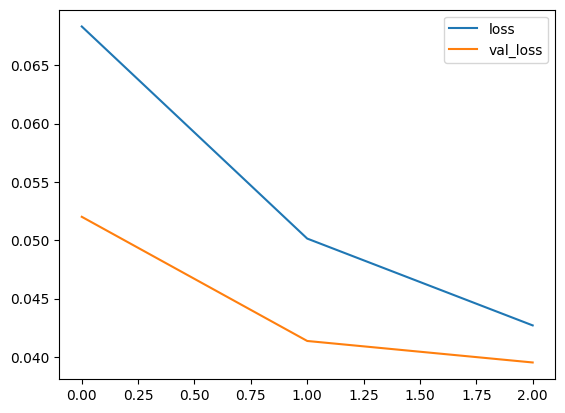

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame((history.history)).plot()
plt.show()

#PREDICTIONS

In [ ]:

batch=test.as_numpy_iterator().next()



In [ ]:
input_text=vectorizer('You love me right')

In [ ]:
l=np.expand_dims(input_text,0)
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res=model.predict(l)>0.5
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


array([[False, False, False, False, False, False]])

In [ ]:
batch_x,batch_y=test.as_numpy_iterator().next()
(model.predict(batch_x)>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from tensorflow.keras.metrics import Precision ,Recall,CategoricalAccuracy as c


In [ ]:
pre=Precision()
re=Recall()
acc=c()


In [ ]:
for batch in test.as_numpy_iterator():
  x_true,y_true=batch
  yhat=model.predict(x_true)
  y_true=y_true.flatten()
  yhat=yhat.flatten()
  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)



In [ ]:
print(f'PRECISION:{pre.result().numpy()},RECALL:{re.result().numpy()},ACCURACY:{acc.result().numpy()}')


PRECISION:0.8857707381248474,RECALL:0.7056045532226562,ACCURACY:0.519362211227417


# TEST AND GRADIO

In [ ]:
!pip install gradio

import gradio as gr


In [ ]:
model.save('toxicity.h5')
model=tf.keras.models.load_model('toxicity.h5')


In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
i=vectorizer("i will kill you my girl and haunt down")
res=model.predict(np.expand_dims(i,0))
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


array([[0.7868867 , 0.00905063, 0.12586294, 0.09182913, 0.2238762 ,
        0.03480924]], dtype=float32)

In [ ]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [ ]:
def score_comment(comment):
  vc=vectorizer([comment])
  res=model.predict(vc)
  text=''
  for idx,col in enumerate(df.columns[2:-1]):
    text+='{}:{}\n'.format(col,res[0][idx]>0.5)
  return text

In [ ]:
interface=gr.Interface(fn=score_comment,
                       inputs=gr.components.Textbox(lines=2,placeholder='comment to be checked'),
                       outputs='text')

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://284a45595858f30d46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
